# <font color='blue'>Barnes, R. "Gene"</font> - <font color='purple'><u>MIS670 Capstone Project</u></font> - 5/7/2018

## <font color='purple'>K-State Honor Code:</font> "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [1]:
# ++++++++++++++++++Popular Packages Section+++++++++++++++++++++++++++++++++++++++++++++
import io
import json
import requests
import urllib2
import datetime
import csv
import time
import nltk
import re
import sklearn
import logging
import seaborn as sns
import numpy as np
import pandas as pd

#++++++++++++++++++++Web Scraping++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
from lxml import html
import urllib2
from bs4 import BeautifulSoup as bsoup
from urllib2 import urlopen
from time import sleep
from selenium import webdriver

#++++++++++++++++++++Word Preparation/Processing Section+++++++++++++++++++++++++++++++++++
# Word Analysis with NLTK; stopwords, FreqDist, word_tokenize
from nltk import tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from pattern.en import sentiment
from collections import Counter

# To ignore all warnings that arise here to enhance clarity
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim') 

#++++++++++++++++++++Data Visualization Section+++++++++++++++++++++++++++++++++++++++++++
# Gensim packages
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

# Other Gensim and Sklearn packages for NFM, LSI, and LDA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile

# Network Analytics (clustering)
#to measure distance or similarity between documents or texts
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

#clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.cluster import AgglomerativeClustering

# WordCloud, MatPlot & other visualization packages
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
% matplotlib inline
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# 1. Data identification and collection (e.g., source of the dataset, method of data collection). 

## The tasks at hand here are to obtain the following data:
1. Find reviews of the best KS College Dorm according to Niche.
2. Find reviews of the worst KS College Dorm according to Niche.
3. Run analysis to compare the data/statistics for each.
4. If possible, use analysis methods that were not learned in class.


## For the method of data collection, let's use the Python package Selenium (not learned in class) to "scrape" the data from Niche's website. This also automates the selection of the "Next" button to help advance to the next page of reviews until all reviews are scraped.

In [2]:
# Selenium setup, using Chrome browser
driver = webdriver.Chrome()

# Chrome opens URL given for K-State Reviews (KSU happens to be the best KS College dorm ranking)
driver.get("https://www.niche.com/colleges/kansas-state-university/reviews/")

# Create array (dict) for reviews
ksu_reviews=[]

# Count the number of reviews for K-State
ksu_count = 0

# Loop to find review text on page and append it to array
while True:
    for review in driver.find_elements_by_xpath("//div[@itemprop='reviewBody']"): 
        ksu_reviews.append(review.text)
        ksu_count = ksu_count + 1

    try: # Selenium looks for "Next" button for pagination; this is what helps to scrape each page until it runs out of pages    
        next_link = driver.find_element_by_xpath("//span[@class='icon-arrowright-thin--pagination']")
        next_link.click()
        time.sleep(3)
    except:
        break

In [3]:
# Display total number of reviews
print "There are", ksu_count, "reviews for K-State in this dataset."

There are 3047 reviews for K-State in this dataset.


In [4]:
# save file to txt for use later
with open("data/ksu-reviews.txt", "w") as output:
    output.write(str(ksu_reviews))

In [5]:
# You can create a csv file for further analysis using Tabular, Excel, etc.
ksudf = pd.DataFrame(ksu_reviews)

ksudf.to_csv('data/ksu_reviews.csv', encoding='utf-8', header=False, index=False)
# Now we can run analysis on the data.

In [6]:
# checking to see if data is in array
ksudf.head()

0
0  Only in Kansas would 76% white be viewed as "v...
1  Kansas State was my first choice in schools to...
2  Amazing! I enjoyed every little thing about it...
3  Kansas State is such an amazing college. Every...
4  Kansas State University provides a very family...

In [7]:
# Selenium setup, using Chrome browser
driver = webdriver.Chrome()

# Chrome opens URL given for University of KS, which happens to be the worst KS College dorms rated
driver.get("https://www.niche.com/colleges/university-of-kansas/reviews/")

# Create array (dict) for reviews
ku_reviews=[]

# Count the number of reviews for University of KS
ku_count = 0

# Loop to find review text on page and append it to array
while True:
    for review in driver.find_elements_by_xpath("//div[@itemprop='reviewBody']"): 
        ku_reviews.append(review.text)
        ku_count = ku_count + 1

    try: # Selenium looks for "Next" button for pagination; this is what helps to scrape each page until it runs out of pages    
        next_link = driver.find_element_by_xpath("//span[@class='icon-arrowright-thin--pagination']")
        next_link.click()
        time.sleep(3)
    except:
        break

In [8]:
# Display total number of reviews
print "There are", ku_count, "reviews for Univ. of Kansas in this dataset."

There are 2967 reviews for Univ. of Kansas in this dataset.


In [9]:
# save file to txt for use later
with open("data/ku-reviews.txt", "w") as output:
    output.write(str(ku_reviews))

In [10]:
# You can create a csv file for further analysis using Tabular, Excel, etc.
kudf = pd.DataFrame(ku_reviews)
kudf.to_csv('data/ku_reviews.csv', encoding='utf-8', header=False, index=False)
# Now we can run analysis on the data.

In [11]:
# checking to see if data is in array
kudf.head()

0
0  I like how big the campus is and how the unive...
1  University of Kansas is a very nice university...
2  Academics are great! Great professors! The cam...
3  As both of my parents went there and I live in...
4  Overall, the University of Kansas is a great p...

In [12]:
#specify the url
niche = "https://www.niche.com/colleges/search/best-college-dorms/s/kansas/?type=public"

#Query the website and return the html to the variable 'page'
page = urllib2.urlopen(niche)

#Parse the html in the 'page' variable, and store it in Beautiful Soup format
soup = bsoup(page, "lxml")

n_pretty=soup.prettify()

In [13]:
# scrape URL for all KS colleges listed
schools=[]
all_links = soup.find_all("a")
for link in all_links:
    schools.append(link.get("href"))

In [14]:
# get school name
u_title=soup.find_all('h2', class_='search-result__title')

# get school's Niche ranking
u_score=soup.find_all('span', class_='search-result-badge-ordinal')

In [15]:
# combine results to one array for saving
final_score = zip(u_title,u_score)
# changing the data more like Excel format
fsdf = pd.DataFrame(final_score)
# then save
fsdf.to_csv("data/fsdf.csv", encoding='utf-8', header=False, index=False)

In [16]:
# ensure we have the data
fsdf

0  \
0  <h2 class="search-result__title">Kansas State ...   
1  <h2 class="search-result__title">Emporia State...   
2  <h2 class="search-result__title">Pittsburg Sta...   
3  <h2 class="search-result__title">Washburn Univ...   
4  <h2 class="search-result__title">Haskell India...   

                                                   1  
0  <span class="search-result-badge-ordinal">200<...  
1  <span class="search-result-badge-ordinal">227<...  
2  <span class="search-result-badge-ordinal">249<...  
3  <span class="search-result-badge-ordinal">452<...  
4  <span class="search-result-badge-ordinal">494<...

# 2. Business and data understanding

### Problem Statement:
K-State Housing and Dining Services is always looking to improve the on-campus living areas (residential halls, apartments) by looking at several types of data, including social media. In this instance, we will use Niche to compare KSU to KU by ranking.

### Business Contexts:
Knowing how our current and future residential students actually feel is good or bad about our residential areas on campus can help our department determine when and where to apply updates to facilities. 

### The Significance of the Problem:
A potential student for any Kansas college may be determined by the on-campus living areas of the college. We have found that on-campus living does increase total enrollment of the college, success of the student to continue to the next classification, and improve the overall GPA and graduation rates.

### The Business Value of the Solution:
Increased enrollment means increased revenue from monies spent for housing, dining, student organizations, books, clothes, etc. for the student during their academic pursuit. 

# 3. Data cleaning & text preprocessing processing (e.g., tokenization, stopword)

In [17]:
# Word cleaning and processing
# currently the data are in list ... convert to string
tokens = str(ksu_reviews)
tokens2 = str(ku_reviews)

# lowecases
tokens = tokens.lower()
tokens2 = tokens2.lower()

# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
tokens2 = re.sub("[^a-zA-Z0-9]", " ", tokens2)

# tokenization or word split
tokens = word_tokenize(tokens)
tokens2 = word_tokenize(tokens2)

# get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
tokens2 = (wordnet_lemmatizer.lemmatize(word) for word in tokens2)

# Remove stopwords
more_stopwords = set(('span', 'http', 'com', 'edu', 'year', 'abuse', 'campus', 'university', 'school', 'dominate', 'kansas'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
tokens2 = (word for word in tokens2 if word not in extra_stoplist)

# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
tokens2 = (word for word in tokens2 if word.isalpha())

#remove short words
tokens = (word for word in tokens if len(word) >= 3)
tokens2 = (word for word in tokens2 if len(word) >= 3)

# compute frequency distribution for all the bigrams in the text
fdist_ksu = nltk.FreqDist(tokens)
fdist_ku = nltk.FreqDist(tokens2)

In [18]:
# We can convert array to dataframe
ksu_df = pd.DataFrame(tokens)
ku_df = pd.DataFrame(tokens2)

In [19]:
# You can create a csv file for further analysis using Tabular, Excel, etc.
ksu_df.to_csv('data/ksu_df.csv', encoding='utf-8', header=False, index=False)
ku_df.to_csv('data/ku_df.csv', encoding='utf-8', header=False, index=False)
# Now we can run analysis on the data.

# 4. Descriptive Analytics: We will use word frequency, simple line plots, word cloud, pivot tables (e.g., groupby), descriptive statistics, to analyze the words within the college reviews.

## Results for KSU

In [20]:
# show the 20 most common words
fdist_ksu.most_common(20)

[(u'student', 930),
 ('state', 810),
 ('great', 600),
 (u'get', 552),
 ('people', 515),
 ('lot', 447),
 ('many', 439),
 (u'kansa', 438),
 ('class', 362),
 ('really', 355),
 ('always', 336),
 ('like', 334),
 ('good', 333),
 ('one', 322),
 ('place', 305),
 ('also', 295),
 ('greek', 286),
 (u'time', 278),
 ('feel', 277),
 ('love', 269)]

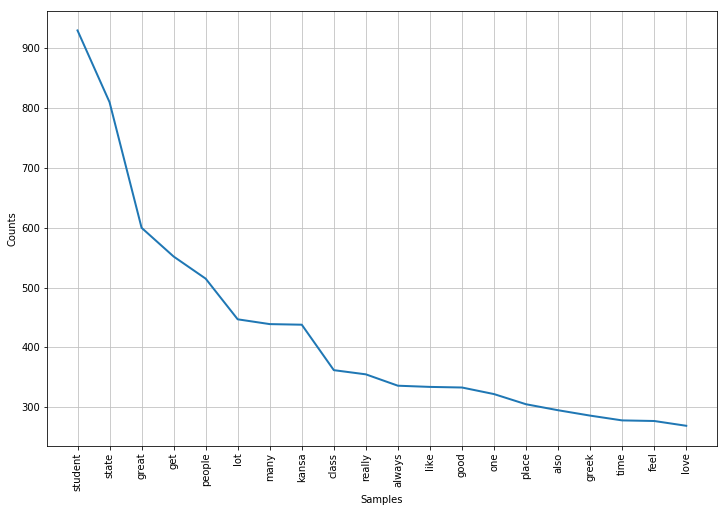

In [21]:
# create plot of word frequency
plt.figure(figsize=(12,8))
fdist_ksu.plot(20)

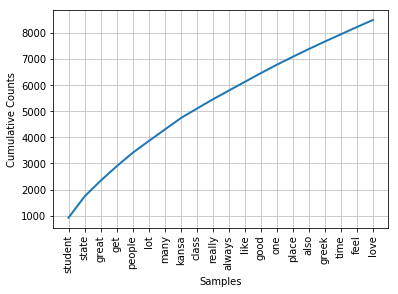

In [22]:
# Cumulative counts plot of word frequency
fdist_ksu.plot(20,cumulative=True)

In [23]:
# What word in word frequency has the highest count?
print "The word with the greatest number of usage is:", fdist_ksu.max()

The word with the greatest number of usage is: student


In [24]:
# prepare the results of word frequency on review data as a list
freq_word_ksu = []

# two values or columns in fdist_a
for k,v in fdist_ksu.items():
    freq_word_ksu.append([k,v])

#make it like an Excel worksheet
wl_ksu = pd.DataFrame(freq_word_ksu)

In [25]:
# View the data of words and their frequencies, first 10 of list
wl_ksu.head(10)

0   1
0       limited  22
1  philantrophy   1
2       raining   2
3         child   6
4     desirable   1
5         noisy   1
6      narcotic   2
7          four  13
8           nwe   1
9       protest   1

In [26]:
# top five words
wl_sort_ksu = wl_ksu.sort_values(1, ascending=False).head(5)
wl_sort_ksu

0    1
4321  student  930
4160    state  810
3631    great  600
1825      get  552
969    people  515

In [27]:
# rename column names
wl_ksu = wl_ksu.rename(columns={0: 'word', 1: 'freq'})
wl_ksu.tail(10)

word  freq
4637        rule    31
4638     portion     2
4639        lift     1
4640      status     1
4641  specialize     1
4642       rural     5
4643         bcs     2
4644       baked     1
4645         rep     1
4646    ticketed     3

In [28]:
# You can create a csv file for further analysis using Tabular, Excel, etc.
wl_ksu.to_csv('data/wl_ksu.csv', encoding='utf-8', header=False, index=False)

In [29]:
# describe analysis of data
wl_ksu['word'].describe()

count     4647
unique    4647
top       ruin
freq         1
Name: word, dtype: object

Here's what people are saying about KSU!


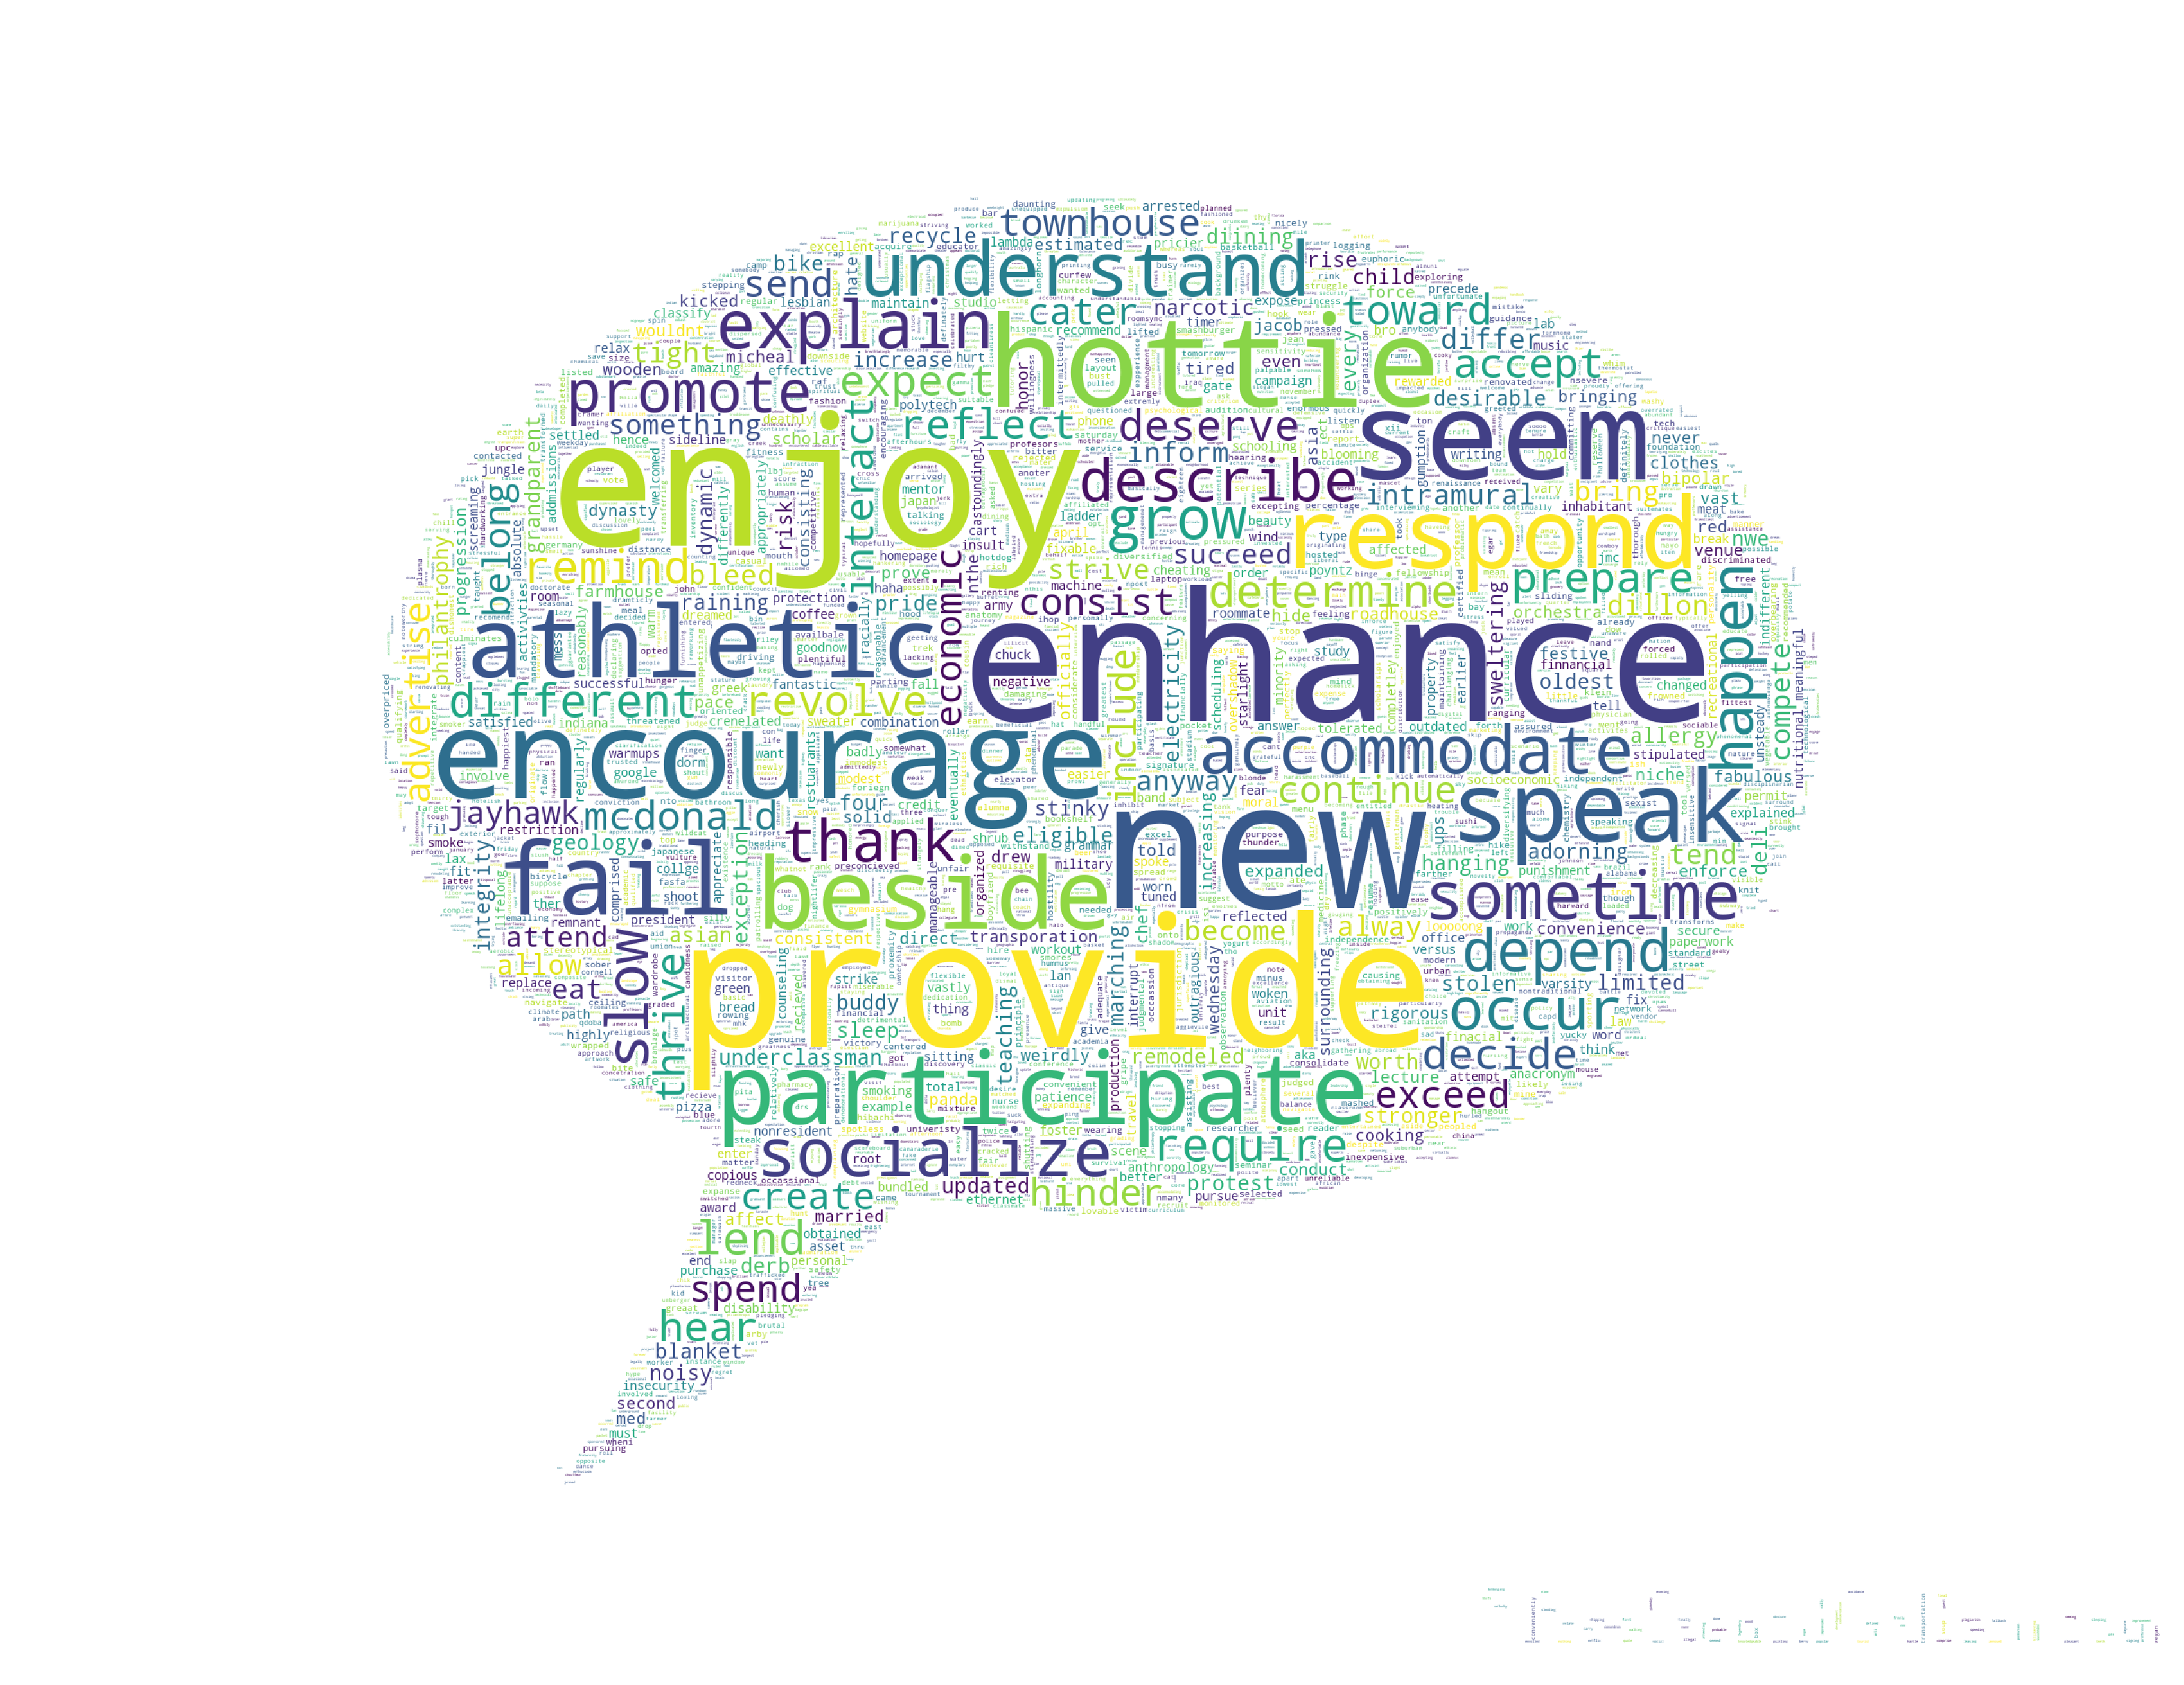

In [30]:
# Positive Review word cloud
d = path.dirname("data/")

# Read the whole text.
text = open(path.join(d, 'wl_ksu.txt')).read()

# read the mask image
# taken from http://www.freestencilgallery.com/?s=auto
mask = np.array(Image.open(path.join(d, "speech-bubble-stencil.png")))

# set up stopwords to remove from text
more = set(('span', 'http', 'com', 'edu', 'year', 'abuse', 'campus', 'university', 'school', 'dominate', 'kansas'))
stopwords = set(STOPWORDS) | more

# create wordcloud using png file as background shape
wc = WordCloud(background_color="white", max_words=5000, mask=mask,
               stopwords=stopwords)

# generate wordcloud
wc.generate(text)

# show word cloud
plt.figure(figsize=(60,60))
plt.imshow(wc)
plt.axis("off")
print "Here's what people are saying about KSU!"

# save images for later use
plt.savefig("data/ksu_niche_review.png")
plt.savefig("data/ksu_niche_review.pdf")

## Results for KU

In [31]:
# show the 20 most common words
fdist_ku.most_common(20)

[('student', 886),
 ('great', 550),
 ('get', 514),
 ('lot', 498),
 ('people', 466),
 ('many', 426),
 (u'class', 397),
 (u'kansa', 379),
 ('good', 363),
 ('place', 356),
 ('always', 345),
 ('one', 343),
 (u'dorm', 329),
 ('lawrence', 325),
 ('like', 321),
 ('really', 310),
 ('time', 299),
 ('greek', 279),
 ('also', 278),
 ('bus', 277)]

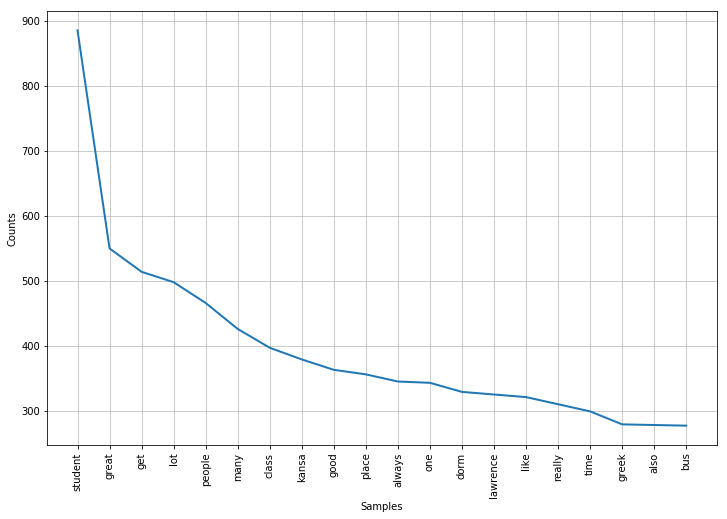

In [32]:
# create plot of word frequency
plt.figure(figsize=(12,8))
fdist_ku.plot(20)

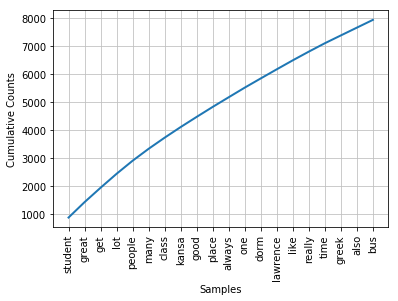

In [33]:
# Cumulative counts plot of word frequency
fdist_ku.plot(20,cumulative=True)

In [34]:
# What word in word frequency has the highest count?
print "The word with the greatest number of usage is:", fdist_ku.max()

The word with the greatest number of usage is: student


In [35]:
# prepare the results of word frequency on review data as a list
freq_word_ku = []

# two values or columns in fdist_a
for k,v in fdist_ku.items():
    freq_word_ku.append([k,v])

#make it like an Excel worksheet
wl_ku = pd.DataFrame(freq_word_ku)

In [36]:
# View data to see the words and their frequency
wl_ku.head(10)

0   1
0          limited  26
1            retch   1
2          nunnery   1
3        worshiped   1
4            saver   2
5  extracurricular   2
6          dynamic   3
7             felt  41
8             four  16
9          protest   2

In [37]:
# top five words
wl_sort_ksu = wl_ku.sort_values(1, ascending=False).head(5)
wl_sort_ksu

0    1
4616  student  886
3858    great  550
1930      get  514
2369      lot  498
1025   people  466

In [38]:
# rename column names
wl_ku = wl_ku.rename(columns={0: 'word', 1: 'freq'})
wl_ku.tail(10)

word  freq
4926    interned     1
4927       jewel     1
4928  nhashinger     1
4929        rule    31
4930      casual     3
4931     portion     3
4932   diagnosis     1
4933  uneducated     1
4934  rebuilding     1
4935    ticketed     2

In [39]:
# You can create a csv file for further analysis using Tabular, Excel, etc.
wl_ku.to_csv('data/wl_ku.csv', encoding='utf-8', header=False, index=False)

In [40]:
# describe analysis of data
wl_ku['word'].describe()

count     4936
unique    4936
top        bat
freq         1
Name: word, dtype: object

Here's what people are saying about KU!


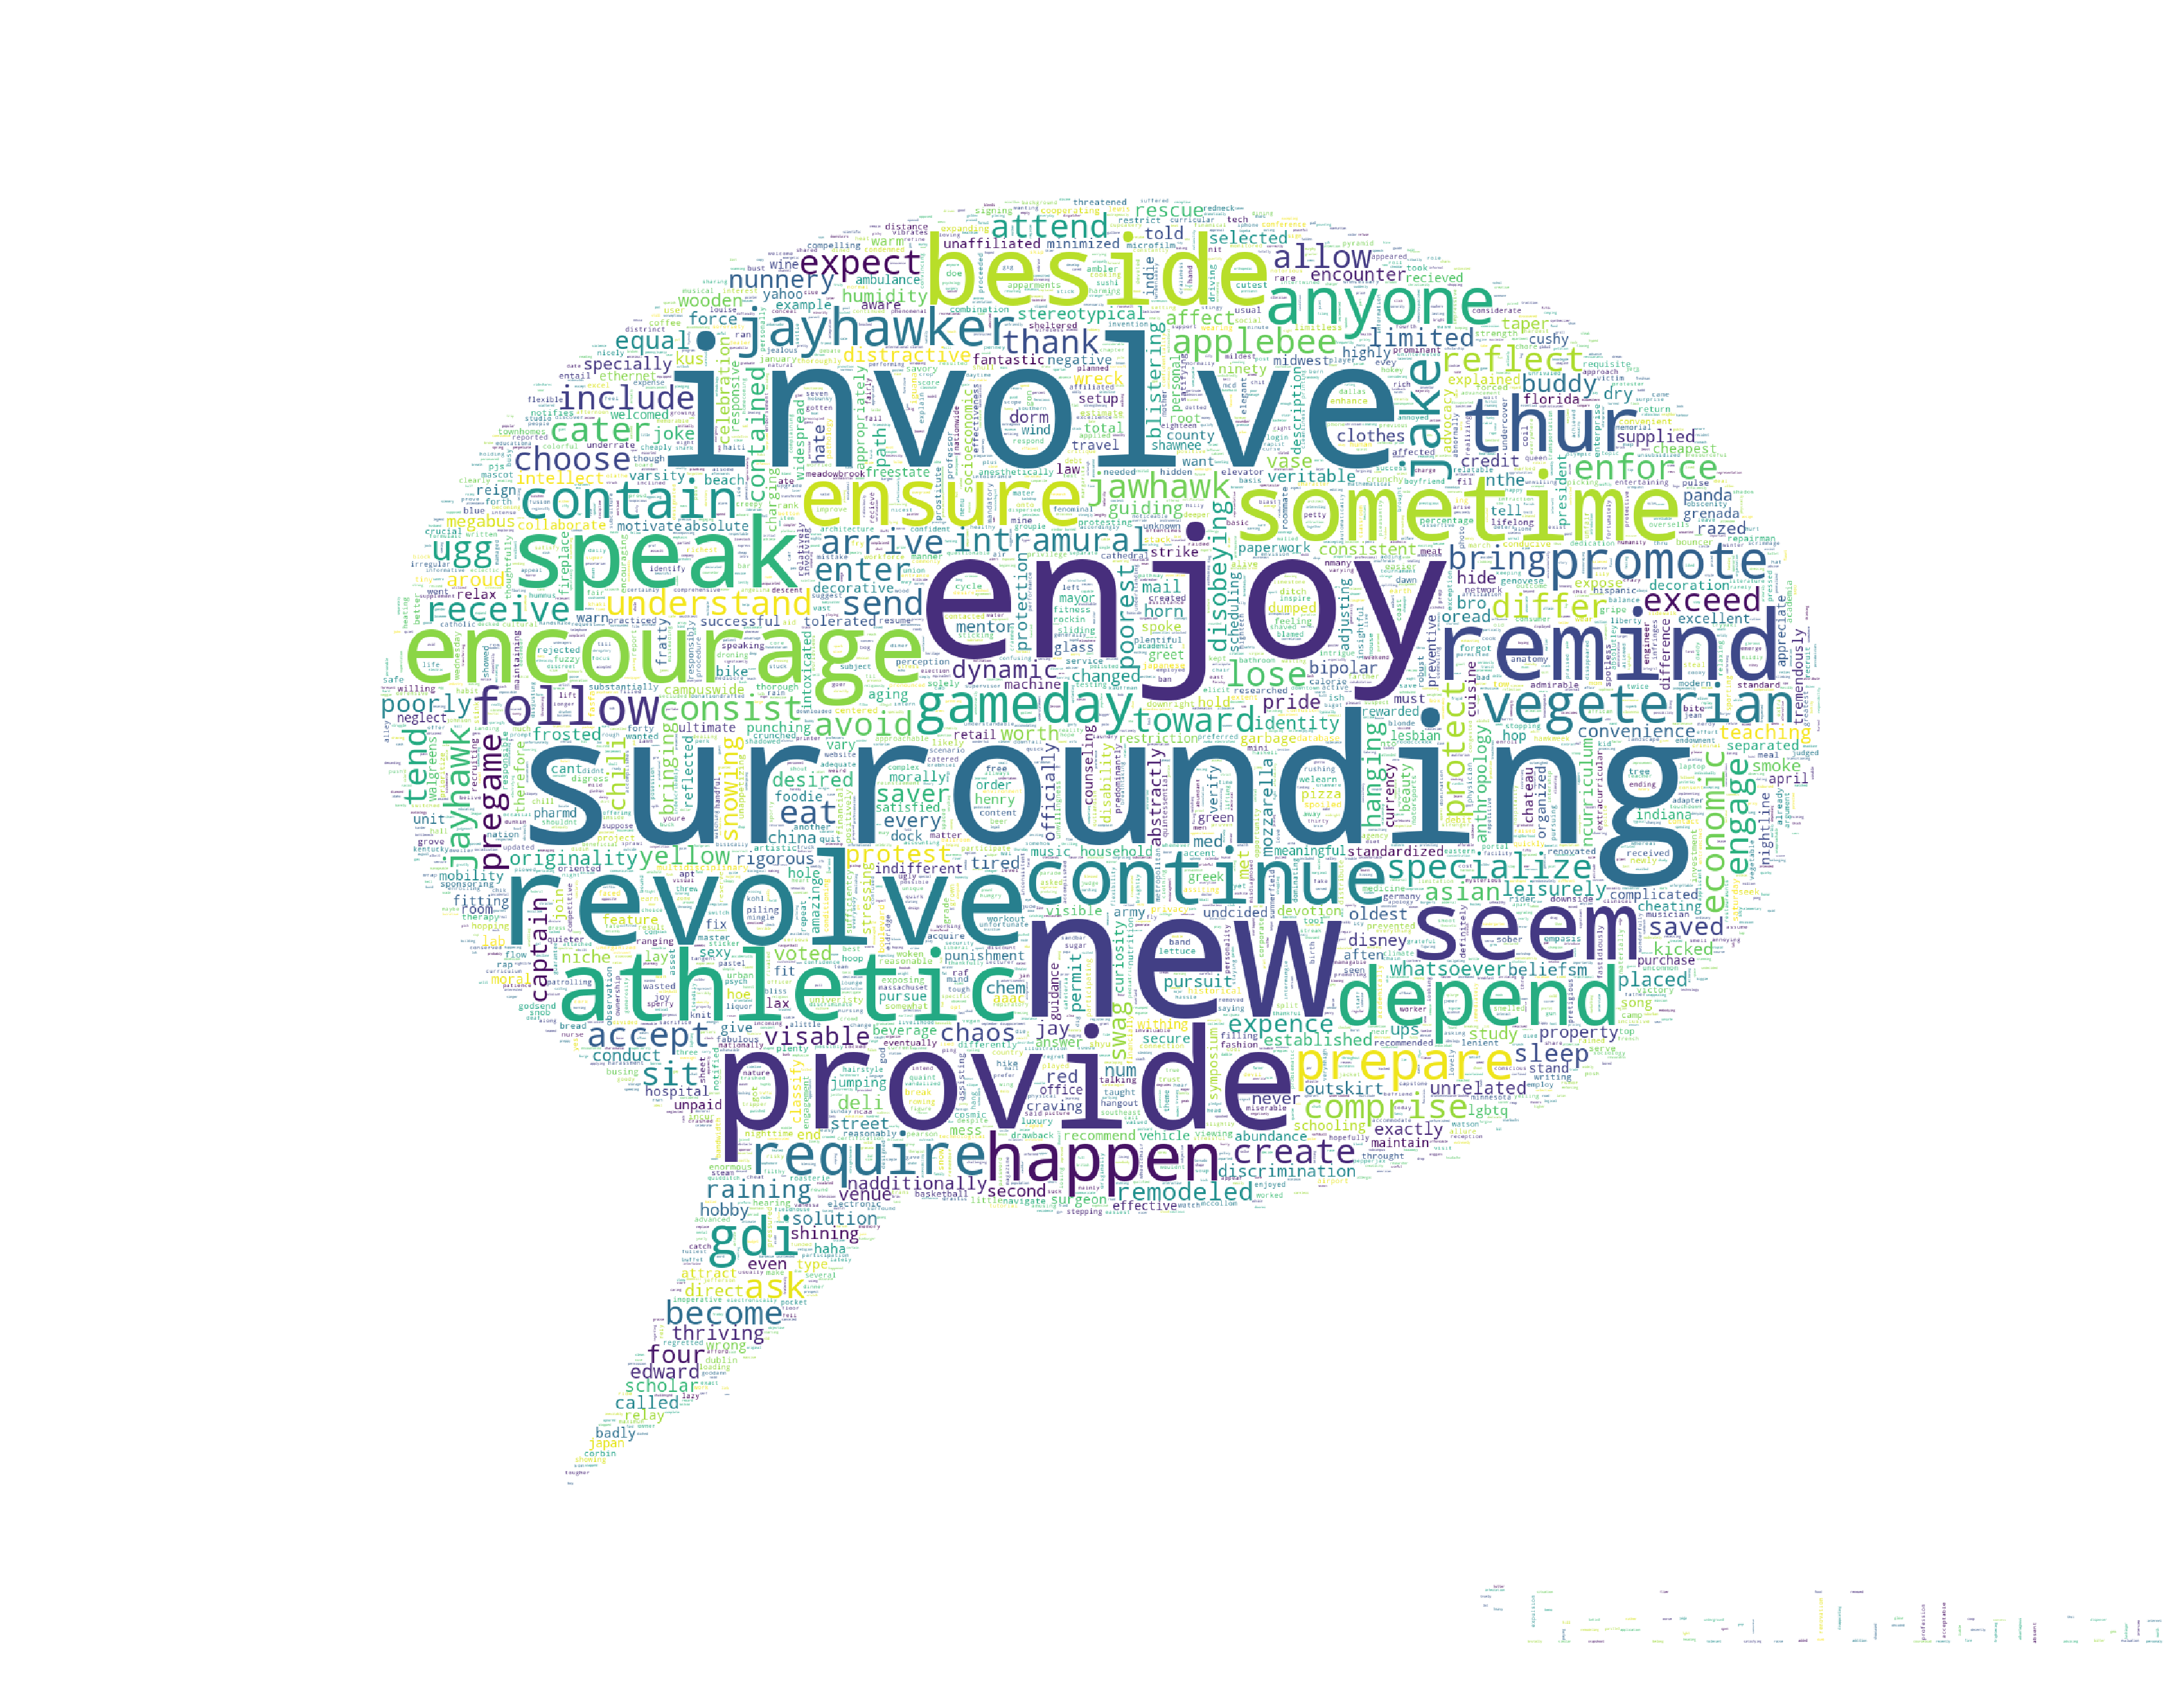

In [41]:
# Positive Review word cloud
d = path.dirname("data/")

# Read the whole text.
text = open(path.join(d, 'wl_ku.txt')).read()

# read the mask image
# taken from http://www.freestencilgallery.com/?s=auto
mask = np.array(Image.open(path.join(d, "speech-bubble-stencil.png")))

# set up stopwords to remove from text
more = set(('span', 'http', 'com', 'edu', 'year', 'abuse', 'kansas', 'campus', 'university', 'school', 'dominate'))
stopwords = set(STOPWORDS) | more

# create wordcloud using png file as background shape
wc = WordCloud(background_color="white", max_words=5000, mask=mask,
               stopwords=stopwords)

# generate wordcloud
wc.generate(text)

# show word cloud
plt.figure(figsize=(60,60))
plt.imshow(wc)
plt.axis("off")
print "Here's what people are saying about KU!"

# save images for later use
plt.savefig("data/ku_niche_review.png")
plt.savefig("data/ku_niche_review.pdf")

## What are the findings from descriptive analytics?

- We had a few findings from the analysis:
1. KSU's and KU's most used word in the reviews was "student".
2. KSU had a higher number of positive reviews () than KU ().
3. Though this did not start out as a "KSU vs. KU" event, it seems to have ended up that way.

# 5. Content analytics: We will use sentiment analysis (positive, negative or neutral) of the college reviews.

## Sentiment Analysys: KSU

In [42]:
# read data file for analysis
openfile = io.open("data/ksu_reviews.csv", "rb")
r = csv.reader(openfile)
ksu2_reviews = [] 
for i in r:
    ksu2_reviews.append(i)
openfile.close()

In [43]:
# break out rows and save file
ksuscore=[]
for row in ksu2_reviews:
    ksuscore.append(sentiment(row[0]))

output=zip(ksuscore)
writer = csv.writer(io.open('data/ksu_sentiment_score.csv', 'wb'))
writer.writerows(output)

C:\Users\Gene\Anaconda2\lib\site-packages\pattern\text\__init__.py:1943: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if w in imap(lambda e: e.lower(), e):
C:\Users\Gene\Anaconda2\lib\site-packages\pattern\text\__init__.py:979: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  and tokens[j] in ("'", "\"", u"”", u"’", "...", ".", "!", "?", ")", EOS):


In [44]:
# Sentiment analysis using Pattern
# setup empty lists for reviews
positive_review = []
negative_review = []
neutral_review = []

# test reviews for sentiment score and separate by result, positive, negative, or neutral
for row in ksu2_reviews:
    ksureviews = row[0]
    PTscore = sentiment(ksureviews)
    if PTscore[0] > 0:
        positive_review.append(ksureviews)
    elif PTscore[0] == 0:
        neutral_review.append(ksureviews)
    else:
        negative_review.append(ksureviews) 

In [45]:
# Display results of sentiment anaylysis using Pattern
print "From the dataset, there are", len(positive_review), "positive reviews using Pattern sentiment analysis."
print "From the dataset, there are", len(negative_review), "negative reviews using Pattern sentiment analysis."
print "From the dataset, there are", len(neutral_review), "neutral reviews using Pattern sentiment analysis."

From the dataset, there are 2480 positive reviews using Pattern sentiment analysis.
From the dataset, there are 347 negative reviews using Pattern sentiment analysis.
From the dataset, there are 220 neutral reviews using Pattern sentiment analysis.


## Sentiment Analysys: KU

In [46]:
# read data file for analysis
openfile = open("data/ku_reviews.csv", "rb")
r = csv.reader(openfile)
ku2_reviews = [] 
for i in r:
    ku2_reviews.append(i)
openfile.close()

In [47]:
# break out rows and save file
kuscore=[]
for row in ku2_reviews:
    kuscore.append(sentiment(row[0]))

output=zip(kuscore)
writer = csv.writer(io.open('data/ks_sentiment_score.csv', 'wb'))
writer.writerows(output)

In [48]:
# Sentiment analysis using Pattern
# setup empty lists for reviews
positive_review2 = []
negative_review2 = []
neutral_review2 = []

# test reviews for sentiment score and separate by result, positive, negative, or neutral
for row in ku2_reviews:
    kureviews = row[0]
    PTscore = sentiment(kureviews)
    if PTscore[0] > 0:
        positive_review2.append(kureviews)
    elif PTscore[0] == 0:
        neutral_review2.append(kureviews)
    else:
        negative_review2.append(kureviews) 

In [49]:
# Display results of sentiment anaylysis using Pattern
print "From the dataset, there are", len(positive_review2), "positive reviews using Pattern sentiment analysis."
print "From the dataset, there are", len(negative_review2), "negative reviews using Pattern sentiment analysis."
print "From the dataset, there are", len(neutral_review2), "neutral reviews using Pattern sentiment analysis."

From the dataset, there are 2324 positive reviews using Pattern sentiment analysis.
From the dataset, there are 408 negative reviews using Pattern sentiment analysis.
From the dataset, there are 235 neutral reviews using Pattern sentiment analysis.


# 6. Network analytics: Clustering groups (using k-value method).

## Results for KSU.

In [50]:
# open spreadsheet to obtain data for analysis
openfile = open("data/ksu_reviews.csv", "rb")
r = csv.reader(openfile)
ksu_content = [] 
for i in r:
    ksu_content.append(i)
openfile.close()    

In [51]:
# display number of documents with content (aka reviews)
len(ksu_content)

3047

In [52]:
# converting csv list to dataframe
ksucon = pd.DataFrame(ksu_content)
ksucon.head()

0
0  Only in Kansas would 76% white be viewed as "v...
1  Kansas State was my first choice in schools to...
2  Amazing! I enjoyed every little thing about it...
3  Kansas State is such an amazing college. Every...
4  Kansas State University provides a very family...

In [53]:
# determining list shape; will show number of rows, columns
ksucon.shape

(3047, 1)

In [54]:
# convert the first column to values so as to perform k-value analysis
content1 = ksucon[0].values.tolist()

In [55]:
# we need to find the k value first
# setting random seed to get the same results each time.
np.random.seed(1) 

ksu_inertia_scores = []
K = range(2, 7)
for k in K:
    X = TfidfVectorizer(stop_words='english', decode_error='ignore').fit_transform(content1) 
    model = KMeans(n_clusters = k).fit(X)
    ksu_inertia_scores.append(model.inertia_)
    
ksu_inertia_scores

[2970.9457272885847,
 2954.5163281916084,
 2939.039406875354,
 2923.9917204247795,
 2913.823125926684]

Text(0.5,1,'Selecting k with the Elbow Method')

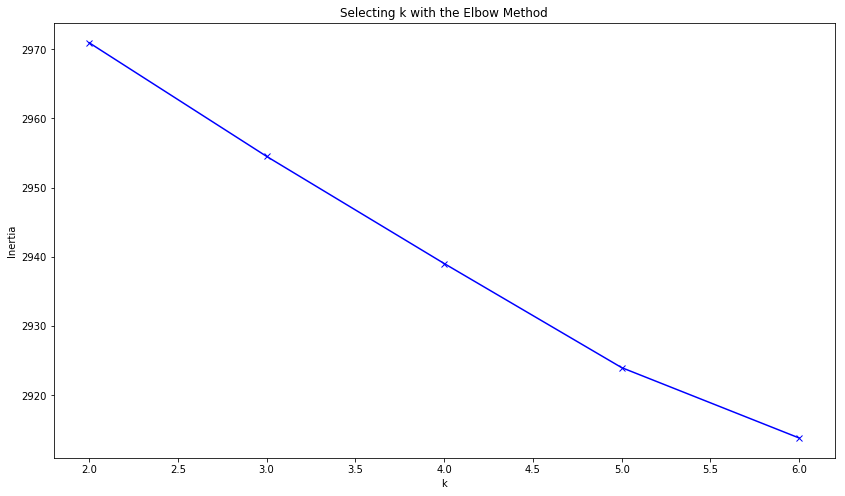

In [56]:
# plot elbow method chart
plt.figure(figsize=(14, 8))
plt.plot(K, ksu_inertia_scores, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Inertia') 
plt.title('Selecting k with the Elbow Method') 

In [57]:
# display finding for k-value
print "Now that we know the right k-value to use, let's continue with our analysis on this score."

Now that we know the right k-value to use, let's continue with our analysis on this score.


In [58]:
#k is the number of clusters you're looking for ... this number is usually based on your domain knowledge
np.random.seed(1) # setting random seed to get the same results each time.

k = 3

tfidf_vectorizer = TfidfVectorizer(stop_words='english', decode_error='ignore')
X = tfidf_vectorizer.fit_transform(content1)
model = KMeans(n_clusters=k, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
# transform X to a matrix ... document term matrix
dtm = X.toarray()
dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
# transform data matrix to dataframe (Excel)
pd.DataFrame(dtm,columns=tfidf_vectorizer.get_feature_names())

000  00am  00pm   10  100  1000   11  110  115  117 ...   younger  \
0     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
1     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
2     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
4     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
5     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
6     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
7     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
8     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
9     0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
10    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
11    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
12    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
13    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
14    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
15    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
16    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
17    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
18    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
19    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
20    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
21    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
22    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
23    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
24    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
25    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
26    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
27    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
28    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
29    0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
...   ...   ...   ...  ...  ...   ...  ...  ...  ...  ... ...       ...   
3017  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3018  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3019  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3020  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3021  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3022  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3023  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3024  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3025  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3026  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3027  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3028  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3029  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3030  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3031  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3032  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3033  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3034  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3035  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3036  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3037  0.0   0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0 ...       0.0   
3038  0.0   0.0   0.0  0.0  0.0

In [61]:
# labels_ : Labels of each point
cluster_name = model.labels_
print cluster_name

[0 1 0 ... 2 2 0]


In [62]:
# change documents to dataframe
df = pd.DataFrame(content1, columns = ['documents'])
df

documents
0     Only in Kansas would 76% white be viewed as "v...
1     Kansas State was my first choice in schools to...
2     Amazing! I enjoyed every little thing about it...
3     Kansas State is such an amazing college. Every...
4     Kansas State University provides a very family...
5     I love how the campus really tries their best ...
6     i liked how my first visit there i already fel...
7     Kansas State is a great place to be if you are...
8     Upon entering the town of Manhattan, there is ...
9     The campus is lively and incredibly beautiful!...
10    Great place to meet friends, make awesome memo...
11    The last time I visited K-State the people tre...
12    It gives me a safe environment to learn. I hav...
13    Kansas state university is a great school with...
14    Kansas State University has so many options an...
15    K-State overall is a great school that offers ...
16    Very eye opening. Faculty always willing to he...
17    The community surrounding it is very welcoming...
18    I have loved my time here! It is a beautiful c...
19    Kansas State University is a very diverse univ...
20    I have had a mostly positive experience at Kan...
21    Kansas State University has so far been a very...
22    Kansas State University has a great, warm, fam...
23    Kansas State University is known for its famil...
24    I like the fact that even though it’s a big ca...
25    Kansas State University is like an Amazing Wel...
26    When I first stepped foot on this campus I imm...
27    Friendly environment, safe, good professors an...
28    I am located at Kansas State Polytechnic, whic...
29    Very Loving and caring schools that genuinely ...
...                                                 ...
3017  Opinion Matters – Manhattan is a very spirited...
3018  Student Center – Just recently been renovated ...
3019  Not Very Very Big at All – Kansas is known for...
3020  Alot of Greek Houses – There are plenty of gre...
3021  Anderson Ave and Aggieville – There are enough...
3022  There are tons of clubs, from skydiving club t...
3023  Awesome Athletes – Our sports rock, although w...
3024  Guys at Kansas State – We've got all stereotyp...
3025  In kansas the weather can change at the drop o...
3026  The Student Union – The student union offers a...
3027  Campus Is as Safe as You Make It – As long as ...
3028  A Great Place to Learn! Kansas State is a grea...
3029  I am not interested in Greek life. It is prett...
3030  Sea of Purple – Everyone dresses how they want...
3031  There is quite a bit of diversity here at Kans...
3032  The Recreational Center – K-State's Rec Center...
3033  K-State has just built a new parking garage th...
3034  Hale Library Is a Great Place to Study – I liv...
3035  Not Much Needed – The Salina campus is rather ...
3036  Campus Is Pretty Laid Back – The only thing I ...
3037  More Drinking Than Drugs – Drinking is a much ...
3038  School Spirit – At Kansas state u find that al...
3039  Both Extreme – Kansas experiences both cold wi...
3040  I have only heard stories from other, but have...
3041  Night Life – Night life isn't so much fun, but...
3042  Goodnow, Marlatt, Jardine, Haymaker.......! Th...
3043  Aggieville Food – In Aggieville there are many...
3044  Most of the computer in labs and in the librar...
3045  Hale Library – The library at Kansas State is ...
3046  Manhattan Sucks – If you don't fit the stereot...

[3047 rows x 1 columns]

In [63]:
# change cluster to dataframe
df1 = pd.DataFrame(model.labels_, columns = ['cluster'])
df1

cluster
0           0
1           1
2           0
3           1
4           1
5           2
6           2
7           2
8           2
9           1
10          1
11          2
12          2
13          1
14          1
15          1
16          1
17          0
18          2
19          1
20          1
21          1
22          1
23          1
24          2
25          1
26          1
27          0
28          1
29          0
...       ...
3017        0
3018        0
3019        0
3020        0
3021        0
3022        2
3023        0
3024        0
3025        0
3026        0
3027        2
3028        1
3029        0
3030        0
3031        1
3032        0
3033        2
3034        0
3035        2
3036        2
3037        0
3038        1
3039        0
3040        2
3041        0
3042        1
3043        0
3044        2
3045        2
3046        0

[3047 rows x 1 columns]

In [64]:
# join the two dataframe into one
df2 = df.join(df1)
df2

documents  cluster
0     Only in Kansas would 76% white be viewed as "v...        0
1     Kansas State was my first choice in schools to...        1
2     Amazing! I enjoyed every little thing about it...        0
3     Kansas State is such an amazing college. Every...        1
4     Kansas State University provides a very family...        1
5     I love how the campus really tries their best ...        2
6     i liked how my first visit there i already fel...        2
7     Kansas State is a great place to be if you are...        2
8     Upon entering the town of Manhattan, there is ...        2
9     The campus is lively and incredibly beautiful!...        1
10    Great place to meet friends, make awesome memo...        1
11    The last time I visited K-State the people tre...        2
12    It gives me a safe environment to learn. I hav...        2
13    Kansas state university is a great school with...        1
14    Kansas State University has so many options an...        1
15    K-State overall is a great school that offers ...        1
16    Very eye opening. Faculty always willing to he...        1
17    The community surrounding it is very welcoming...        0
18    I have loved my time here! It is a beautiful c...        2
19    Kansas State University is a very diverse univ...        1
20    I have had a mostly positive experience at Kan...        1
21    Kansas State University has so far been a very...        1
22    Kansas State University has a great, warm, fam...        1
23    Kansas State University is known for its famil...        1
24    I like the fact that even though it’s a big ca...        2
25    Kansas State University is like an Amazing Wel...        1
26    When I first stepped foot on this campus I imm...        1
27    Friendly environment, safe, good professors an...        0
28    I am located at Kansas State Polytechnic, whic...        1
29    Very Loving and caring schools that genuinely ...        0
...                                                 ...      ...
3017  Opinion Matters – Manhattan is a very spirited...        0
3018  Student Center – Just recently been renovated ...        0
3019  Not Very Very Big at All – Kansas is known for...        0
3020  Alot of Greek Houses – There are plenty of gre...        0
3021  Anderson Ave and Aggieville – There are enough...        0
3022  There are tons of clubs, from skydiving club t...        2
3023  Awesome Athletes – Our sports rock, although w...        0
3024  Guys at Kansas State – We've got all stereotyp...        0
3025  In kansas the weather can change at the drop o...        0
3026  The Student Union – The student union offers a...        0
3027  Campus Is as Safe as You Make It – As long as ...        2
3028  A Great Place to Learn! Kansas State is a grea...        1
3029  I am not interested in Greek life. It is prett...        0
3030  Sea of Purple – Everyone dresses how they want...        0
3031  There is quite a bit of diversity here at Kans...        1
3032  The Recreational Center – K-State's Rec Center...        0
3033  K-State has just built a new parking garage th...        2
3034  Hale Library Is a Great Place to Study – I liv...        0
3035  Not Much Needed – The Salina campus is rather ...        2
3036  Campus Is Pretty Laid Back – The only thing I ...        2
3037  More Drinking Than Drugs – Drinking is a much ...        0
3038  School Spirit – At Kansas state u find that al...        1
3039  Both Extreme – Kansas experiences both cold wi...        0
3040  I have only heard stories from other, but have...        2
3041  Night Life – Night life isn't so much fun, but...        0
3042  Goodnow, Marlatt, Jardine, Haymaker.......! Th...        1
3043  Aggieville Food – In Aggieville there are many...        0
3044  Most of the computer in labs and in the librar...        2
3045  Hale Library – The library at Kansas State is ...        2
3046  Manhattan Sucks – If you don't fit the stereot...        0

[3047 rows x 2 

In [65]:
# this shows which words are significant for each cluster
model.cluster_centers_

array([[0.00074239, 0.00029291, 0.00029291, ..., 0.00093413, 0.00032624,
        0.00026158],
       [0.00084884, 0.        , 0.        , ..., 0.        , 0.00031281,
        0.00030154],
       [0.00151699, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00104176]])

In [66]:
# T is transpose 
pd.DataFrame(model.cluster_centers_, columns=tfidf_vectorizer.get_feature_names()).T

0         1         2
000        0.000742  0.000849  0.001517
00am       0.000293  0.000000  0.000000
00pm       0.000293  0.000000  0.000000
10         0.001377  0.000197  0.005646
100        0.000772  0.000000  0.000592
1000       0.000168  0.000000  0.000000
11         0.000267  0.000470  0.000000
110        0.000140  0.000000  0.000000
115        0.000159  0.000000  0.000000
117        0.000195  0.000000  0.000000
12         0.000528  0.002809  0.000000
1200       0.000129  0.000000  0.000000
126        0.000184  0.000000  0.000000
13         0.000253  0.000416  0.000000
14         0.000185  0.000000  0.000259
15         0.000518  0.000000  0.001207
150        0.000345  0.000000  0.000354
15th       0.000057  0.000000  0.000000
170        0.000000  0.000000  0.000721
18         0.000693  0.000000  0.000000
180        0.000315  0.000000  0.000610
1st        0.000319  0.000304  0.000523
20         0.001036  0.000527  0.001493
200        0.000050  0.000350  0.000249
2009       0.000108  0.000000  0.000000
2012       0.000000  0.000284  0.000000
2013       0.000344  0.000252  0.000000
2015       0.000201  0.000000  0.000000
2016       0.000073  0.000000  0.000000
2017       0.000000  0.000991  0.000000
...             ...       ...       ...
writing    0.000751  0.000257  0.000000
written    0.000138  0.000386  0.000417
wrong      0.000418  0.000000  0.001540
wrote      0.000067  0.000000  0.000000
xf         0.000199  0.000000  0.000000
xii        0.000000  0.000670  0.000000
ya         0.000141  0.000000  0.000000
yard       0.000000  0.000616  0.000000
yards      0.000000  0.000000  0.000449
yea        0.000165  0.000000  0.000000
yeah       0.000301  0.000498  0.000000
year       0.007362  0.006719  0.008429
years      0.002788  0.003083  0.001574
yelling    0.000000  0.001040  0.000000
yes        0.000634  0.002455  0.000000
yesterday  0.000000  0.000517  0.000000
yogurt     0.000169  0.000000  0.000000
york       0.000176  0.000954  0.000000
youll      0.000170  0.000000  0.000000
young      0.000836  0.000846  0.000696
younger    0.000318  0.000000  0.000935
youre      0.000281  0.000000  0.000000
yout       0.000118  0.000000  0.000000
yrs        0.000169  0.000000  0.000000
yucky      0.000316  0.000000  0.000000
yummy      0.000325  0.000000  0.000000
zero       0.000274  0.000000  0.000000
zile       0.000934  0.000000  0.000000
zone       0.000326  0.000313  0.000000
zoo        0.000262  0.000302  0.001042

[5305 rows x 3 columns]

In [67]:
# determine popular word list from cluster
popularwordlist = pd.DataFrame(model.cluster_centers_, columns=tfidf_vectorizer.get_feature_names()).T
popularwordlist.sort_values([0, 1], ascending=[1,0])
# sort data by column 0 in the ascending order

0         1         2
encouraging    0.000000  0.002485  0.000000
bowl           0.000000  0.002367  0.000000
sold           0.000000  0.002327  0.000000
participating  0.000000  0.002325  0.000000
genuine        0.000000  0.002257  0.000000
pursue         0.000000  0.002182  0.000000
treats         0.000000  0.002063  0.000000
cheering       0.000000  0.002032  0.000000
vibe           0.000000  0.001911  0.000435
conference     0.000000  0.001884  0.000000
improving      0.000000  0.001751  0.000000
word           0.000000  0.001742  0.000387
athlete        0.000000  0.001642  0.000000
pleased        0.000000  0.001511  0.000615
participation  0.000000  0.001470  0.000000
stepped        0.000000  0.001443  0.001762
hype           0.000000  0.001411  0.000000
embraced       0.000000  0.001384  0.000000
approachable   0.000000  0.001384  0.000000
winning        0.000000  0.001363  0.000000
investment     0.000000  0.001347  0.000000
revolves       0.000000  0.001331  0.000475
heath          0.000000  0.001298  0.000000
educators      0.000000  0.001283  0.000000
exist          0.000000  0.001268  0.000360
lifetime       0.000000  0.001266  0.000000
conversation   0.000000  0.001237  0.000334
informs        0.000000  0.001218  0.000000
foot           0.000000  0.001214  0.001235
fly            0.000000  0.001211  0.000000
...                 ...       ...       ...
help           0.010173  0.021915  0.007184
variety        0.010255  0.002027  0.005378
helpful        0.010291  0.010262  0.005337
best           0.010458  0.015787  0.005910
major          0.010676  0.007574  0.000386
friends        0.010698  0.006524  0.007038
different      0.010714  0.009223  0.005552
student        0.010939  0.021093  0.009196
college        0.011005  0.022963  0.007623
aid            0.011069  0.001006  0.000000
dorms          0.011395  0.001549  0.016629
easy           0.011739  0.008034  0.007243
time           0.012202  0.009686  0.011478
classes        0.012261  0.009874  0.007649
options        0.012314  0.002865  0.012079
professors     0.012483  0.014062  0.002702
program        0.012755  0.008024  0.001877
don            0.012913  0.004099  0.021764
just           0.013592  0.011631  0.011151
like           0.013667  0.027713  0.011987
pretty         0.014297  0.008034  0.017906
lot            0.015361  0.014482  0.020616
food           0.016273  0.001636  0.004393
life           0.016752  0.005729  0.009591
really         0.019915  0.018957  0.011821
people         0.019916  0.033621  0.019417
greek          0.020432  0.002531  0.006093
good           0.020520  0.011507  0.013641
students       0.021622  0.029639  0.027496
great          0.025833  0.045632  0.018355

[5305 rows x 3 columns]

In [68]:
# printing top words
model.cluster_centers_

array([[0.00074239, 0.00029291, 0.00029291, ..., 0.00093413, 0.00032624,
        0.00026158],
       [0.00084884, 0.        , 0.        , ..., 0.        , 0.00031281,
        0.00030154],
       [0.00151699, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00104176]])

In [69]:
# here descending order
model.cluster_centers_.argsort()[:, ::-1]

array([[2089, 4563, 2051, ...,  931, 3848, 3114],
       [4480, 4122, 2593, ..., 2191, 2190, 1706],
       [ 706, 3348, 4071, ..., 2718, 2717, 2652]], dtype=int64)

In [70]:
#generate an csv file for this word list (or word frequency analysis) per cluster
#using this word frequency, you can find more information about the documents in each cluster.

wordlist_per_cluster = pd.DataFrame(model.cluster_centers_, columns=tfidf_vectorizer.get_feature_names()).T
wordlist_per_cluster.to_csv("data\wordlist_per_cluster.csv", encoding='utf8', header=False, index=False)

In [71]:
# get top five words for each cluster

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()

for i in range(k):
    print "Cluster: ", i,
    for ind in order_centroids[i, :5]:
        print terms[ind],
    print    

Top terms per cluster:
Cluster:  0 great students good greek people
Cluster:  1 state school kansas university love
Cluster:  2 campus parking safe housing feel


In [72]:
# further text processing and prep for dendrogram
tfidf_vectorizer = TfidfVectorizer(stop_words='english', decode_error='ignore')
X = tfidf_vectorizer.fit_transform(content1)
dtm = X.toarray()
ward_model = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(dtm)
ward_model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

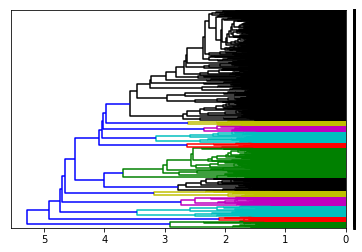

<Figure size 2304x1152 with 0 Axes>

In [73]:
# create "Dendrogram" plot of clusters
linkage_matrix = ward(dtm)
dendrogram(linkage_matrix, orientation="left", labels=ward_model.labels_)#content1)
plt.figure(figsize=(32,16))
plt.tight_layout()  # fixes margins

plt.savefig('data/ksu_ward_clusters.png', dpi=200) #save figure as ward_clusters

# 7. Final analysis & storytelling (technical and managerial implications and suggestions).

- Through all of this analysis, we found in KS the best college / dorm from the Niche website is KSU (ranked 200) and the worst college / dorm is KU (not ranked). 
- We analyzed the text of the reviews to see if their sentiment was positive, negative, or neutral. 
- Of the text in the reviews, we determined what words were used the most (word frequency and wordcloud).
- Clustering of the reviews was made to see where they all appeared.
- In the end, between KSU and KU, the former had more positive reviews, total reviews, and better statistics compared to the latter.
- The managerial implications are that KSU is doing a better job, both with more likeable residential areas on campus and as a college altogether. HDS knows it needs to keep a full compliment of facility and custodial staff for each of the residential areas to keep the residential students happy, safe, and feel like they are at home. 

# References:
https://www.analyticsvidhya.com/blog/2015/10/beginner-guide-web-scraping-beautiful-soup-python/

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

http://www.gregreda.com/2013/03/03/web-scraping-101-with-python/

https://medium.freecodecamp.org/how-to-scrape-websites-with-python-and-beautifulsoup-5946935d93fe

http://selenium-python.readthedocs.io/locating-elements.html

## Other References:
- Dr. B. Chae, for providing additional material not covered in class (Selenium, K-Means Clustering Methods).

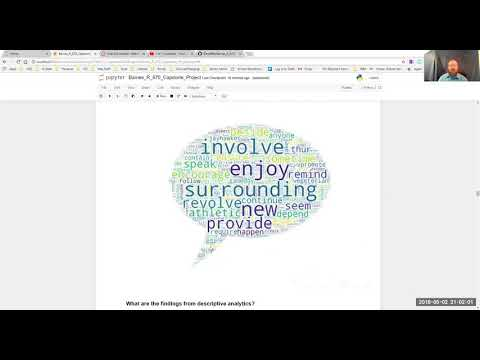

In [76]:
# You can include Youtube video in Ipython notebook
from IPython.display import YouTubeVideo
YouTubeVideo('5vI05PFnjQE')